In [178]:
# importing the packages
import pandas as pd
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# setting the dataset path
dataset_path = "../datasets/"
twitter_gan_folder = "TwitterGAN/"
random_twitter_folder = "25k_random_twitter_images/"
style_gan_folder = "styleGAN_25k/"

In [18]:
# twitter faces test_set
twitter_gan_faces_list = os.listdir(f"{dataset_path + twitter_gan_folder}")
f"There are {len(twitter_gan_faces_list)} images present which are identified as GAN faces"

'There are 272 images present which are identified as GAN faces'

In [19]:
# random twitter profile pictures
random_twitter_profiles_list = os.listdir(f"{dataset_path + random_twitter_folder}")
f"There are {len(random_twitter_profiles_list)} images present"

'There are 27290 images present'

## Our aim is to detect open and closed eyes, along with nose and lips.

We are using 2 different cascades for eye detection
<br>
1 for nose detection
<br>
1 for lips detection
<br>
Reference https://stackoverflow.com/questions/48905775/difference-betweeen-haarcascade-eye-and-haarcascade-eye-tree-eyeglasses-xml
https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters

In [114]:
# read the face and eye cascade values
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
feature_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')

## Extracting faces from random twitter images

In [171]:
# eye center formula = (x + int(w/2), y + int(h/2))

positive_feature_count = 0
negative_feature_count = 0

features_list = []
experiments_list = []

# conducting experiment for min_neighbors = 2 to 10 and increasing the sf by 5%
for min_neighbors in tqdm(range(2, 11)):
    # reinitializing the scale_factor
    scale_factor = 1.00
    
    while scale_factor <= 1.2:
        # incrementing the scale_factor
        scale_factor += 0.01
        
        # reinitializing the count metrics
        positive_feature_count = 0
        negative_feature_count = 0
        features_list = []
                
        # extracting the faces and eye coordinates
        for file_path in twitter_gan_faces_list:
            img = cv2.imread(f"{dataset_path + twitter_gan_folder + file_path}", cv2.IMREAD_GRAYSCALE) 

            # resizing the image to same dimension
            img = cv2.resize(img, (200, 200))

            # detect for face
            face_rect = face_cascade.detectMultiScale(img, scaleFactor=1.05, minNeighbors=5)

            # front face found
            if len(face_rect) != 0:
                # detect features
                feature_rect = feature_cascade.detectMultiScale(img, scaleFactor=scale_factor, minNeighbors=min_neighbors)   

                # features found
                if len(feature_rect) != 0:
                    for (x, y, w, h) in eye_rect:
                        # appending the coordinate
                        features_list.append([file_path, x + int(w/2), y + int(h/2)])

                        # increment the left eye positive count
                        positive_feature_count += 1
                else:
                    # increment the negative count
                    negative_feature_count += 1
        
        # creating a df for x and y features
        df = pd.DataFrame(features_list, columns=['file_name', 'feature_x', 'feature_y'])
        file_name = f"facial_features_{scale_factor}_{min_neighbors}_features.csv"
        df.to_csv(f"./results/{file_name}")
        df.drop(df.index , inplace=True)

        experiments_list.append([scale_factor, min_neighbors, positive_feature_count, negative_feature_count, file_name])

f"done with the processing of data...."

100%|████████████████████████████████████████████| 9/9 [46:11<00:00, 307.91s/it]


'done with the processing of data....'

In [173]:
df = pd.DataFrame(experiments_list, columns=['scale_factor', 'min_neighbors', 'positive_feature_count', 'negative_feature_count', 'file_name'])
df.to_csv("experiments_csv")

In [174]:
experiments_df = pd.read_csv("experiments_csv")

In [175]:
experiments_df = experiments_df.drop(columns=['Unnamed: 0'])

In [176]:
experiments_df.head()

,scale_factor,min_neighbors,positive_feature_count,negative_feature_count,file_name
0,1.01,2,1088,0,facial_features_1.01_2_features.csv
1,1.02,2,1084,1,facial_features_1.02_2_features.csv
2,1.03,2,1084,1,facial_features_1.03_2_features.csv
3,1.04,2,1076,3,facial_features_1.04_2_features.csv
4,1.05,2,1076,3,facial_features_1.05_2_features.csv


<AxesSubplot:xlabel='scale_factor', ylabel='positive_feature_count'>

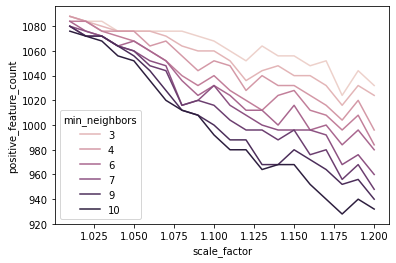

In [179]:
sns.lineplot(data=experiments_df, x=experiments_df["scale_factor"], y=experiments_df["positive_feature_count"], hue=experiments_df["min_neighbors"])

In [181]:
max(experiments_df["positive_feature_count"])

1088

In [182]:
experiments_df.query('positive_feature_count == positive_feature_count.max()')

,scale_factor,min_neighbors,positive_feature_count,negative_feature_count,file_name
0,1.01,2,1088,0,facial_features_1.01_2_features.csv
20,1.01,3,1088,0,facial_features_1.01_3_features.csv
40,1.01,4,1088,0,facial_features_1.01_4_features.csv


In [184]:
os.listdir("./")

['facial_features_1.01_2_features.csv',
 '.DS_Store',
 'image_preprocessing.ipynb',
 'haarcascade_eye.xml',
 'haarcascade_lefteye_2splits.xml',
 'Image Preprocessing and eye detection.ipynb',
 'haar cascade.ipynb',
 'haarcascade_righteye_2splits.xml',
 'experiments_csv',
 'experiments1_csv',
 'haarcascade_frontalface_default.xml',
 '.ipynb_checkpoints']

In [185]:
facial_features_df = pd.read_csv("facial_features_1.01_2_features.csv")

In [186]:
facial_features_df.head()

,Unnamed: 0,file_name,feature_x,feature_y
0,0,twitter_GAN_profiles_1673898489_16132647404652...,73,93
1,1,twitter_GAN_profiles_1673898489_16132647404652...,122,93
2,2,twitter_GAN_profiles_1673898489_16132647404652...,93,119
3,3,twitter_GAN_profiles_1673898489_16132647404652...,96,141
4,4,twitter_GAN_profiles_1675459188_14972759585118...,73,93


In [188]:
facial_features_df = facial_features_df.drop(["Unnamed: 0"], axis=1)

In [205]:
facial_features_df.shape
set_s = set()

for i in range(len(facial_features_df)):
    set_s.add((facial_features_df["feature_x"][i], facial_features_df["feature_y"][i]))
set_s

{(73, 93), (93, 119), (96, 141), (122, 93)}

<AxesSubplot:xlabel='feature_x', ylabel='feature_y'>

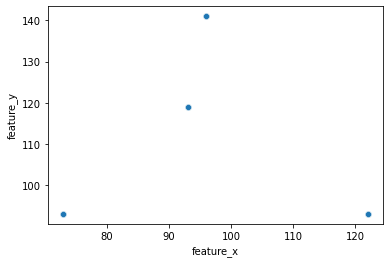

In [194]:
sns.scatterplot(data=facial_features_df, x="feature_x", y="feature_y")

In [217]:
temp_df = pd.DataFrame([[122 - 73 + 93 - 93, 300], [122 - 73 + 93 - 93, 300]], columns=["distance", "number_of_images"] )
temp_df


# fetch coordinate which has same or close enough y coordinate value..

,distance,number_of_images
0,49,300
1,49,300


In [ ]:
# sakshi is giving the final train set... (50k images)
# use this train set to conduct experimentation and find the best value for haar cascade values of scale factor and min_neighbor for eye
# 